**Тема:**
«Анализ данных крупного агрегатора такси (поиск инсайтов, проверка гипотезы, составление
рекомендаций стейкхолдерам)».

**Цели:**

* исследовать данные
* выделить основные закономерности в данных
* проверить гипотезу о поведенческом
предпочтении пользователей к определённому классу такси
* сделать выводы и презентовать результаты

**План исследования:**

* предобработка данных

* анализ качественных и количественных параметров

* формулирование и проверка гипотез

* выводы

**Описание датасета:**

Датасет содержит информацию о поездках на такси одного из известных агрегаторов:
*   order_gk — идентификатор поездки;
*   weekday_key — день недели совершения поездки;
* hour_key — час совершения поездки;
* distance_km — дистанция поездки;
* offer_class_group — класс поездки (Economy, Comfort, Premium, Delivery);
* driver_response — статус поездки (1 — поездка совершена; 0 — отмена).

# Общая информация

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-white')
import seaborn as sns
import scipy
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [11]:
# загрузка данных

data = pd.read_csv(r'C:\Users\Alexa\Downloads\dip_hw_x_taxi.csv')
data.head(5)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1


In [12]:
data.tail(5)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
1995,918581,5,16,8.591,Delivery,1
1996,918656,7,14,30.835,Comfort,1
1997,918683,4,19,20.365,Delivery,0
1998,918737,2,23,14.960,Economy,0
1999,919196,4,19,68.559,Economy,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   int64  
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


В таблице data 6 столбцов и 2000 строк, пропущенных значений нет. Столбец driver_response можно преобразовать в булев формат.

Согласно документации к данным:
*   order_gk — идентификатор поездки;
*   weekday_key — день недели совершения поездки;
* hour_key — час совершения поездки;
* distance_km — дистанция поездки;
* offer_class_group — класс поездки (Economy, Comfort, Premium, Delivery);
* driver_response — статус поездки (1 — поездка совершена; 0 — отмена)

# Предобработка данных

Проверим на наличие дубликатов в датасете:

In [14]:
data[data.duplicated()]

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response


Преобразуем столбец driver_response в булев формат.

In [15]:
data['driver_response'] = data['driver_response'].astype(bool)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   int64  
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 80.2+ KB


Посмотрим на основные описательные статистики.

In [17]:
data.describe()

,order_gk,weekday_key,hour_key,distance_km
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,11.608500,26.275848
std,270556.211847,2.007256,6.918465,18.876336
min,412.000000,1.000000,0.000000,0.024000
25%,227126.500000,2.000000,6.000000,12.177000
50%,458637.000000,4.000000,12.000000,22.828500
75%,709420.250000,6.000000,18.000000,36.434250
max,919196.000000,7.000000,23.000000,138.950000


Вычислим количество значений по классам такси.

In [18]:
data.groupby(data['offer_class_group']).count()

,order_gk,weekday_key,hour_key,distance_km,driver_response
offer_class_group,,,,,
Comfort,500,500,500,500,500
Delivery,500,500,500,500,500
Economy,500,500,500,500,500
Premium,500,500,500,500,500


## Анализ

Визуализируем распределение дистанций поездок.

Text(0, 0.5, 'Частота')

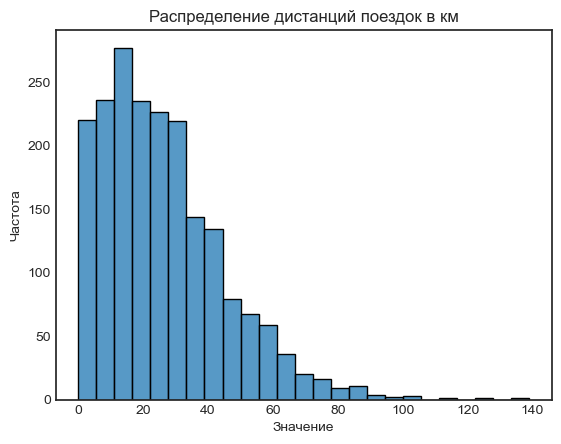

In [19]:
sns.histplot(data['distance_km'], bins=25)
plt.title('Распределение дистанций поездок в км')
plt.xlabel('Значение')
plt.ylabel('Частота')

Визуализируем распределения дистанций поездок, по каждому классу
такси в отдельности, а также определим типы распределений для
эконом-класса и комфорт-класса.

Text(0, 0.5, 'Дистанция')

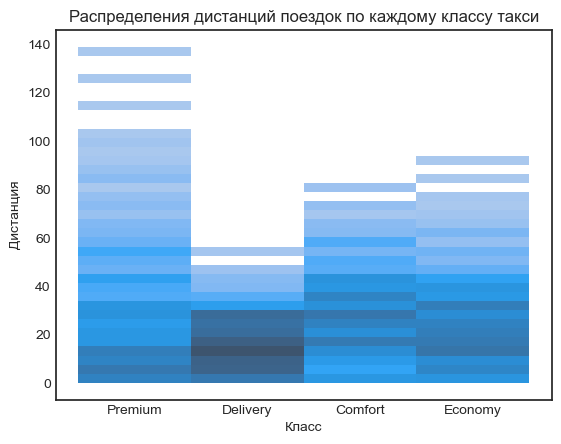

In [20]:
sns.histplot(data=data, x=data['offer_class_group'], y=data['distance_km'])
plt.title('Распределения дистанций поездок по каждому классу такси')
plt.xlabel('Класс')
plt.ylabel('Дистанция')

Сформируем отдельные фреймы, содержащие информацию по двум классам такси: Economy и Comfort. Визуализируем распределения дистанций поездок по каждому классу такси в отдельности.

In [21]:
economy = data[data['offer_class_group'] == 'Economy']
comfort = data[data['offer_class_group'] == 'Comfort']

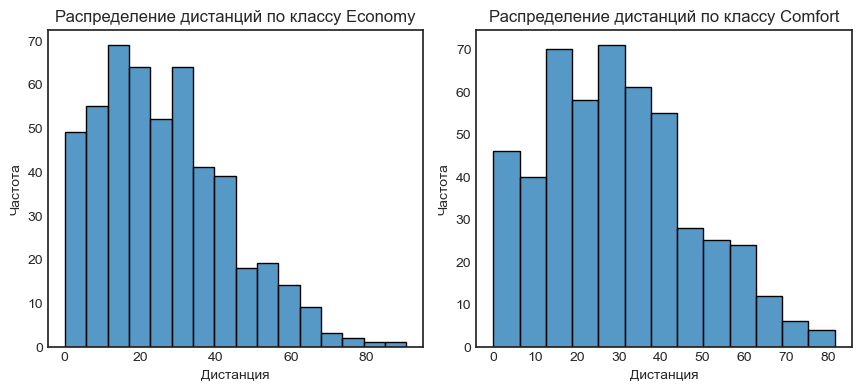

In [22]:
fig = plt.figure(figsize=(13, 11))

ax1 = plt.subplot(3, 3, 1)
sns.histplot(economy['distance_km'])
plt.title('Распределение дистанций по классу Economy')
plt.xlabel('Дистанция')
plt.ylabel('Частота')

ax2 = plt.subplot(3, 3, 2)
sns.histplot(comfort['distance_km'])
plt.title('Распределение дистанций по классу Comfort')
plt.xlabel('Дистанция')
plt.ylabel('Частота')

plt.tight_layout()
plt.show();

Определим типы распределений для эконом-класса и комфорт-класса.

Визуально оценив графики, можно предположить, что выборки не имеют нормального распределения. Чтобы проверить это, можно воспользоваться критерием Шапиро-Уилка.

В основе проверки лежит проверка гипотез. Н₀ — данные распределены нормально, Н₁ — данные не имеют нормального распределения.

Проверим критерий Шапиро-Уилка, возвращающий значение вычисленной статистики и p-value. В качестве критического значения в большинстве случаев берется 0.05. При p-value меньше 0.05 мы вынуждены отклонить нулевую гипотезу о нормальности распределения.

Проверим распределение атрибута distance_km для класса Economy:

In [23]:
economy = economy['distance_km']
economy

11      83.830
13      14.239
14       4.334
20      26.413
21      21.296
         ...  
1984    13.201
1986    20.151
1994    42.714
1998    14.960
1999    68.559
Name: distance_km, Length: 500, dtype: float64

In [24]:
stat, p = scipy.stats.shapiro(economy)
alpha = 0.05

if p < alpha:
  print(f'p-value {p} меньше 0.05, мы вынуждены отклонить Н₀. Данные не распределены нормально')
else:
  print(f'p-value {p} больше 0.05, мы можем принять Н₀. Данные распределены нормально')

p-value 1.533143195731057e-10 меньше 0.05, мы вынуждены отклонить Н₀. Данные не распределены нормально


Проверим распределение атрибута distance_km для класса Comfort:

In [25]:
comfort = comfort['distance_km']
comfort

6        2.142
15      10.889
16      28.825
17      17.281
23       4.126
         ...  
1979    33.284
1988    56.873
1989    13.005
1993    32.839
1996    30.835
Name: distance_km, Length: 500, dtype: float64

In [26]:
stat, p = scipy.stats.shapiro(comfort)
alpha = 0.05

if p < alpha:
  print(f'p-value {p} меньше 0.05, мы вынуждены отклонить Н₀. Данные не распределены нормально')
else:
  print(f'p-value {p} больше 0.05, мы можем принять Н₀. Данные распределены нормально')

p-value 7.28838500663187e-08 меньше 0.05, мы вынуждены отклонить Н₀. Данные не распределены нормально


Используем график qq-plot для того, чтобы визуально проверить полученные выше выводы. Если данные распределены нормально, все точки на графике QQ будут лежать близко к прямой диагональной линии.

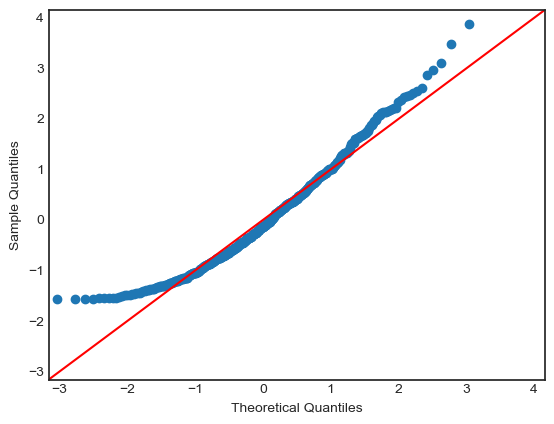

In [27]:
plot = sm.ProbPlot(economy, stats.t, fit=True)
fig = plot.qqplot(line='45')
plt.show()

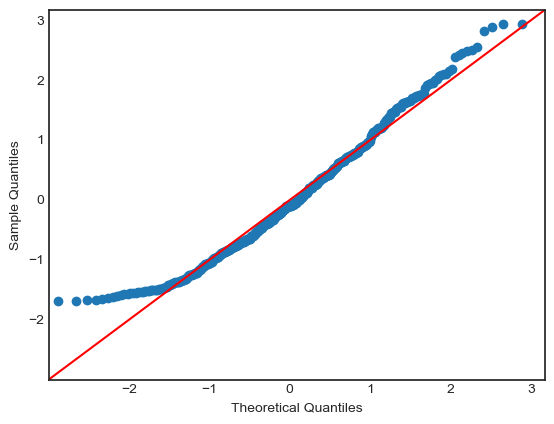

In [28]:
probplot = sm.ProbPlot(comfort, stats.t, fit=True)
fig = probplot.qqplot(line='45')
plt.show()

Как мы видим, выборки действительно не имеют нормального распределения.

Сформируем выборки по классам эконом и комфорт. Визуализируем
пересечение интервалов дистанций этих классов.

In [29]:
data_filtered = data[(data.offer_class_group == 'Comfort') | (data.offer_class_group == 'Economy')]

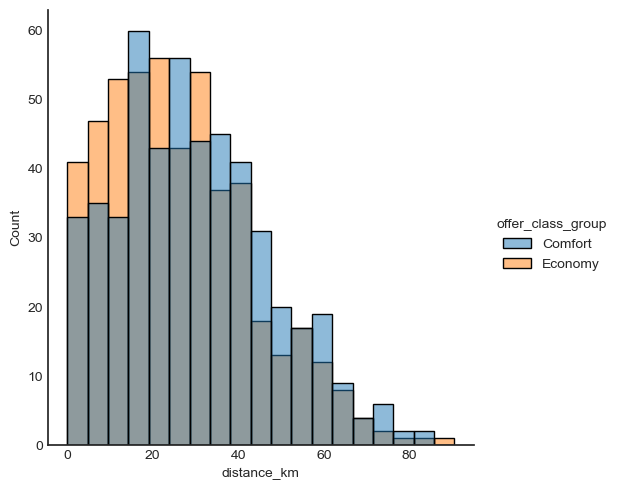

In [30]:
sns.displot(x='distance_km',
            hue='offer_class_group',
            data=data_filtered)

По графику можно видеть, что распределение дистанций поездок классом Comfort больше смещено вправо относительно распределения дистанций в классе Economy, что может свидетельствовать о том, что для совершения поездок на более дальние дистанции пассажиры предпочитают пользоваться классом Comfort, а не Economy.

Прежде чем мы проведем статистический тест и проверем гипоетезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса, нужно решить, будем ли мы предполагать, что две совокупности имеют одинаковую дисперсию или нет. Это важно для дальнейшего выбора статистического критерия. Как правило, мы можем предположить, что совокупности имеют равные дисперсии, если отношение большей выборочной дисперсии к меньшей выборочной дисперсии составляет менее 4:1.

Для проверки этого предположения преобразуем интересующие нас срезы данных в массив numpy array и расчитаем их дисперсии.

In [31]:
comfort_np = comfort.to_numpy()
economy_np = economy.to_numpy()

In [32]:
print(np.var(economy_np), np.var(comfort_np))

288.970467792396 310.710160016944


Посчитаем отношение большей выборочной дисперсии к меньшей выборочной дисперсии: 

In [33]:
print(np.var(comfort_np) / np.var(economy_np))

1.0752315362556921


Как видно, соотношение < 4. Это означает, что мы можем предположить, что дисперсии генеральной совокупности равны.

Проверим этот вывод с помощью теста Левена. Это статистика, используемая для оценки равенства дисперсий для переменной, рассчитанной для двух или более групп. Тест Левена проверяет гипотезу Н₀ о том, что дисперсии популяции равны. Если результирующее p-значение теста Левена меньше некоторого уровня значимости (обычно 0.05), полученные различия в выборочных дисперсиях вряд ли имели место на основе случайной выборки из популяции с равными дисперсиями. Таким образом, нулевая гипотеза равных дисперсий отвергается и делается вывод о наличии разницы между дисперсиями в популяции.

In [34]:
test_leven, p = stats.levene(economy_np, comfort_np)
print(f'Statistics={test_leven}, p-value={p}')
alpha = 0.05

if p < alpha:
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

Statistics=0.9060251439274503, p-value=0.3414017329239566
Принять гипотезу о равенстве дисперсий


По результатам теста мы можем подтвердить предположение о равентсве дисперсий.

## Проверка гипотезы

Для оценки уровня статистической значимости мы возьмем двухвыборочный t-критерий, он решает задачу доказательства наличия различий средних значений количественной переменной в случае, когда имеются лишь две сравниваемые группы. Нам необходима функция ttest_ind, вычисляющая t-тест для двух независимых выборок.

Проведем статистический тест и проверим гипотезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса.

Сформулируем гипотезу: 

Н₀ – средняя дистанция поездок в классах Comfort и Economy одинакова

Н₁ – средняя дистанция поездок значимо отличается


уровень значимости = 5%

In [35]:
import scipy.stats as stats

statistic, p = stats.ttest_ind(a=economy, b=comfort, equal_var=False) # Так как нормальность распределения не соблюдается
print(f'Statistics={statistic}, p-value={p}')

alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о равенстве выборок')
else:
    print('Принять гипотезу о равенстве выборок')

Statistics=-3.1706426042389815, p-value=0.001567442448178933
Отклонить гипотезу о равенстве выборок


Тест показывает, что гипотеза Н₀ не подтверждена, следовательно, отвергаем нулевую гипотезу. Поэтому принимаем альтернативную гипотезу Н₁, что средняя дистанция поездок в классах Comfort и Economy отличается.

Вычислим средние выборок исследуемых классов и с учётом полученного
результата проверки гипотез определим какой из классов
предпочитают на дальние поездки (Comfort или Economy).

In [36]:
print(f'средняя дистанция поездок для класса Comfort: {round(comfort.mean(), 3)} \n'
      f'средняя дистанция поездок для класса Economy: {round(economy.mean(), 3)}')

средняя дистанция поездок для класса Comfort: 29.759 
средняя дистанция поездок для класса Economy: 26.283


Для формулирования выводов и рекомендаций необходимо так же проанализировать закономерности в количестве отменяемых поездок и в распределении количества заказов по дням недели. 
Посмотрим, в каком из классов доля отмененных поездок по отношению ко все заказам этого класса выше.

In [37]:
canceled_orders = data.loc[data.driver_response == False] \
                      .groupby('offer_class_group') \
                      .agg({'driver_response':'count'}) \
                      .sort_values(by='driver_response', ascending=False)

In [38]:
all_orders = data.groupby('offer_class_group') \
                 .agg({'driver_response':'count'}) \
                 .sort_values(by='driver_response', ascending=False)

In [39]:
round((canceled_orders / all_orders) * 100, 2).sort_values(by='driver_response', ascending=False)

,driver_response
offer_class_group,
Economy,57.8
Comfort,51.4
Delivery,34.8
Premium,21.2


Как можно видеть, самый большой процент отменяемых заказов приходится на класс Economy (57.8%), второй по количеству - класс Comfort (51.4%).

Теперь посмотрим, в какие дни недели чаще всего заказывают такси классов Comfort и Economy.

In [40]:
data.loc[(data.offer_class_group == 'Comfort') | (data.offer_class_group == 'Economy')] \
.groupby(['offer_class_group', 'weekday_key']) \
.agg({'driver_response':'count'}) \
.sort_values(by='driver_response', ascending=False)
    

driver_response
offer_class_group weekday_key                 
Comfort           6                         87
Economy           2                         86
                  3                         82
Comfort           5                         81
                  4                         75
Economy           7                         72
                  5                         71
Comfort           1                         69
Economy           1                         67
Comfort           7                         64
Economy           4                         64
Comfort           2                         63
                  3                         61
Economy           6                         58

Исходя из наших данных, можно сделать вывод, что классом Economy чаще пользуются по вторникам и средам, а классом Comfort - по четвергам, пятницам и субботам. 

## Выводы

В ходе работы:

* ознакомились с предоставленными данными, проверили датасет на пропуски и дубликаты, преобразовали данные в нужные типы

* провели исследовательский анализ данных

* визуализировали распределения дистанций поездок: общее и по каждому классу такси в отдельности

* проверили распределение дистанций поездок в классах Comfort и Economy на нормальность с помощью критерия Шапиро-Уилка и графика qq-plot. Определили, что данные не имеют нормального распределения 

* проверили, что выборки из классов Comfort и Economy имеют одинаковую дисперсию с помощью теста Левена

* сформулировали и проверили гипотезу о том, что средняя дистанция поездок в классе Comfort статистически значимо отличается от средней дистанции поездок в классе Economy

* вычислили и сравнили среднее по этим двум классам

В результате проведенного исследования мы можем сделать вывод о том, что средняя дистанция поездок в классах Comfort и Economy значимо различается и для совершения поездок на более длительные расстояния пассажиры чаще предпочитают класс Comfort.

## Рекомендации

1. Исходя из того, что для длительных поездок пассажиры чаще выбирают класс Comfort, рекомендуется увеличить парк автомобилей для этого класса так, чтобы для заказа всегда были доступные машины, так как такие поездки приносят хорошую прибыль.

2. Учитывая количество заказов в зависимости от дня недели, рекомендуется распределять заказы на Comfort класс таким образом, чтобы в самые популярные дни для этого класса (четверг, пятница и суббота) - всегда были свободные машины.

3. В обоих классах (Comfort и Economy) очень высокий процент отмененных поездок - более половины всех поездок не состоялось. Для снижения доли отмен можно рекомендовать ввести оплату за подачу машины вне зависимости от того, состоялась ли поездка. Так мы сможем частично компенсировать убытки из-за отмененных поездок.

4. Для популяризации класса Economy и его более частого использования для длительных поездок можно предложить пассажирам скидки на поездки этим классом (чем больше дистанция - тем выше скидка), особенно в не-пиковые дни для этого класса (понедельник, четверг, суббота).